In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import sklearn
import sys

Print versions

In [2]:
print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))

The Python version is 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)].

The Numpy version is 1.15.4.

The Pandas version is 0.23.4.

The Matplotlib version is 3.0.2.

The Scikit-Learn version is 0.20.2.



# Load data

The data set from the UCI Repository: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

The data is based on credit defaults in Taiwan, which were apparently a big problem for their economy.

# Helpful links related to data set

Similar project in R:
https://rstudio-pubs-static.s3.amazonaws.com/281390_8a4ea1f1d23043479814ec4a38dbbfd9.html

Long and kind of boring notebook in python:
https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook/

Discussion of this dataset on Kaggle, including someone contacting the author about the incorrect data dictionary and getting a response:
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion

The published research based on this data set: https://bradzzz.gitbooks.io/ga-dsi-seattle/content/dsi/dsi_05_classification_databases/2.1-lesson/assets/datasets/DefaultCreditCardClients_yeh_2009.pdf

Use the keyword options as a teachable moment for the course.

In [3]:
df = pd.read_excel('../Data/default of credit card clients.xls', skiprows=[0])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

This is conveniently coded as numbers already.

__We should transform categoricals to strings and them make the student convert to numbers.__

### Data dictionary

Starting with the second column, 'LIMIT_BAL'

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 

We are not allowed to use gender.

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### IDs
How many unique IDs are there?

In [86]:
df['ID'].nunique()

30000

Are they simply 1 - 30000 ?

In [89]:
np.array_equal(df['ID'].values, range(1,30001))

True

Yes.

### Balances

"Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit."

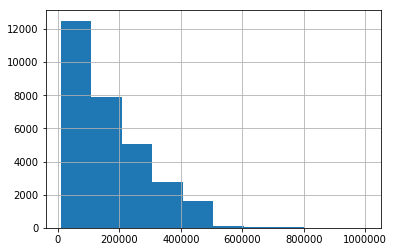

In [90]:
df['LIMIT_BAL'].hist()

### Education
"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

In [93]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Looks like 5 and 6 are unknown categories. It would probably be good to just lump these in with 4, perhaps as an exercise.

Look at other columns

In [7]:
df.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'], dtype=object)

# History of past payment

### From the publication, and data dictionary on UCI:

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
- X6 = the repayment status in September, 2005;
- X7 = the repayment status in August, 2005;
- . . .;
- X11 = the repayment status in April, 2005.

The measurement scale for the repayment status is:
- -1 = pay duly;
- 1 = payment delay for one month;
- 2 = payment delay for two months;
- . . .;
- 8 = payment delay for eight months;
- 9 = payment delay for nine months and above. 

This is practically a numerical column except for the -1, which doesn't really make sense. We may want to replace it with 0, or transform it to a string `'On time'`.

Note here, the first column looks like it should have been called, `'PAY_1'`.

In [9]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [70]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [81]:
df['PAY_0'].value_counts().sort_index()

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_0, dtype: int64

What we see here is that there are undocumented values (-2, 0), and that they are quite prevalent. Someone on Kaggle emailed the author of the publication based on this dataset, who responded: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608. The relevant part:

---

-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

---

So, what do -2, -1, and 0 actually mean? Further down in that discussion, somebody with some experience from the financial industry weighs in. Their response mostly makes sense to me, although not entirely. I would wager to guess (also based somewhat on the link that person posted, as well as this link: https://www.experian.com/blogs/ask-experian/what-is-revolving-credit/):

- -2 means the person started that month with a zero balance, and never used any credit or made any payments
- -1 means they had a balance and paid it in full
- 0 means they had a balance and made at least the minimum payment, but didn't pay the whole balance

The reference to "revolving credit" is a little confusing. Based on some research, it seems like revolving credit is basically a credit card, where the available credit increases as you pay down the balance. Does this imply that only some accounts in this data set are credit cards, while others may be, for instance, personal loans?

This seems a little complicated. I think we ought to assume that all accounts are credit cards. A simple interpretation of category 0 here is that the person made at least the minimum payment, but still had some unpaid balance.

Now, based on some exploratory modeling below, it turns that the fraction of people who default is roughly the same for classes -2, -1, and 0. It might be simplest, for the purposes of communicating this data set in a training, to simply lump these together in to a single category, called "acount in good standing".

The other values, 1, 2, 3,... seem to indicate the number of months the account has not been in good standing (the account owner didn't make at least the minimum monthly payment).

# Amount of bill statement
X12-X17: Amount of bill statement (NT dollar).
- X12 = amount of bill statement in September, 2005;
- X13 = amount of bill statement in August, 2005;
- . . .;
- X17 = amount of bill statement in April, 2005. 

In [10]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


In [71]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


# Amount of previous payment
X18-X23: Amount of previous payment (NT dollar).
- X18 = amount paid in September, 2005;
- X19 = amount paid in August, 2005;
- . . .;
- X23 = amount paid in April, 2005. 

In [11]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']].head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679


In [72]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


# The target variable
In the publication, the author defines default as

"This research employed a binary variable – default payment (Yes = 1, No = 0), as the response variable"

However, nowhere in the paper is this defined any further. So what is default? When does it happen? We already know from our data set, how many months a person may not have made their minimum monthly payment. Apparently it could be up to 8. Does this mean, if they fail to make the minimum monthly payment for 9 months, that's when they are considered "in default"?

# Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [16]:
len(df.columns)

25

Define features

In [33]:
feature_cols = df.columns.values.tolist()

In [34]:
feature_cols

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

Everything but id, sex, and the target variable can be a feature:

In [35]:
not_features = ['ID', 'SEX', 'default payment next month']

In [36]:
for this_non_feature in not_features:
    feature_cols.remove(this_non_feature)

In [37]:
feature_cols

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

Make the train/test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
df.loc[:,feature_cols], df['default payment next month'],
test_size=0.2, random_state=24)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 22)
(24000,)
(6000, 22)
(6000,)


# Random forest model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10,
                            min_samples_split=2, min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0, max_features='sqrt',
                            max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, bootstrap=True,
                            oob_score=False, n_jobs=None, random_state=24,
                            verbose=0, warm_start=False, class_weight=None)

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=24, verbose=0, warm_start=False)

# Predict and assess goodness of fit

In [43]:
y_pred_proba = rf.predict_proba(X_test)

In [44]:
y_pred_proba.shape

(6000, 2)

Probability predictions for the positive class

In [45]:
y_pred_proba[:,1]

array([0.04153538, 0.66375306, 0.10573859, ..., 0.05685212, 0.12346572,
       0.23152088])

In [46]:
from sklearn import metrics

In [47]:
metrics.roc_auc_score(y_test, y_pred_proba[:,1])
# 0.7807771098115069 using features index 3 and above
# 0.7884719130120524 using all possible features (e.g. all but gender)

0.7884719130120524

Results from the "undirtied" data, as benchmarks:
- 0.7807771098115069 using features index 3 and above
- 0.7884719130120524 using all possible features (e.g. all but gender)

Removing 5% of the samples (which will be replaced by duplicate IDs with zero data that need to be removed)

What are the feature importances?

In [48]:
rf.feature_importances_

array([0.04047487, 0.00905592, 0.00546447, 0.02873838, 0.24814197,
       0.10993833, 0.0558929 , 0.0580048 , 0.04788871, 0.02529284,
       0.03681649, 0.03225194, 0.03005243, 0.0279887 , 0.02741498,
       0.02918688, 0.03837712, 0.03738342, 0.03015098, 0.02781666,
       0.02645188, 0.02721534])

In [49]:
feat_sort_ix = np.argsort(rf.feature_importances_)

In [52]:
feat_sort_ix = np.flipud(feat_sort_ix)

In [53]:
feat_sort_ix

array([ 4,  5,  7,  6,  8,  0, 16, 17, 10, 11, 18, 12, 15,  3, 13, 19, 14,
       21, 20,  9,  1,  2])

In [54]:
for this_ix in feat_sort_ix:
    print(feature_cols[this_ix], rf.feature_importances_[this_ix])

PAY_0 0.24814197002667393
PAY_2 0.10993832804628133
PAY_4 0.058004797065138655
PAY_3 0.05589290124160154
PAY_5 0.04788870929518616
LIMIT_BAL 0.040474866011218864
PAY_AMT1 0.038377115093222544
PAY_AMT2 0.037383419767647114
BILL_AMT1 0.03681648829321584
BILL_AMT2 0.03225194184874298
PAY_AMT3 0.030150980324207124
BILL_AMT3 0.03005243432829259
BILL_AMT6 0.02918687840383437
AGE 0.028738383508470945
BILL_AMT4 0.027988701852163178
PAY_AMT4 0.027816663624650625
BILL_AMT5 0.027414975398174564
PAY_AMT6 0.027215341998499225
PAY_AMT5 0.026451875469002042
PAY_6 0.025292840705998153
EDUCATION 0.009055920144314744
MARRIAGE 0.005464467553463372


So, the most important predictor is related to whether or not someone has paid their bill on time last month, or how many months it's been since they paid on time. Then the most recent months, in order, with the same data, are the next few most important predictors. It looks like these make up about half of the total feature importance.

### Possible way to make an interesting data quality problem
Since `'PAY_0'` is decidedly the  most important feature, this would be the one where missing values would have the largest effect. An interesting approach to this might be to introduce some missing values here, and then have a "problem within a problem" where we use another model, perhaps random forest, to predict the missing value based on the rest of the features.

In [64]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [66]:
df['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

So, this is strange. The data dictionary indicates this is supposed to include values of -1, and then 1 through 9. Instead, there is -2, -1, and then 0 through 8.

What does this mean? Let's look at the relationship between the most important predictors, and the response

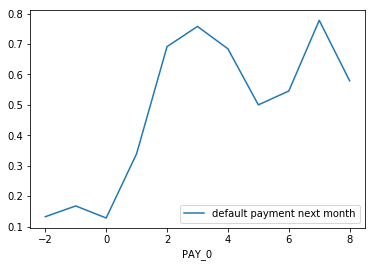

In [68]:
df.groupby('PAY_0').agg({'default payment next month': 'mean'}).plot()

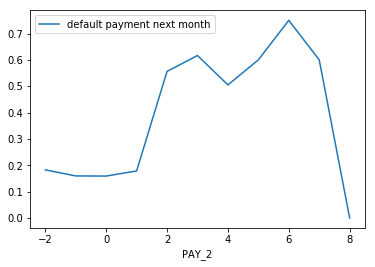

In [69]:
df.groupby('PAY_2').agg({'default payment next month': 'mean'}).plot()

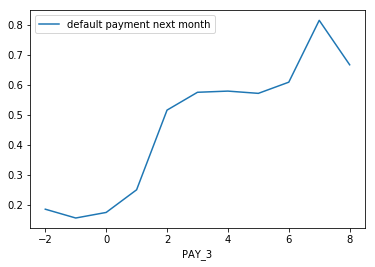

In [82]:
df.groupby('PAY_3').agg({'default payment next month': 'mean'}).plot()

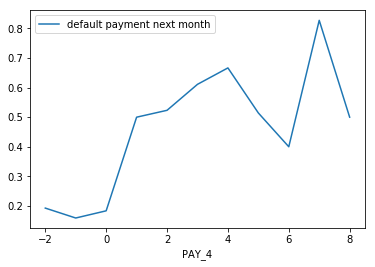

In [83]:
df.groupby('PAY_4').agg({'default payment next month': 'mean'}).plot()

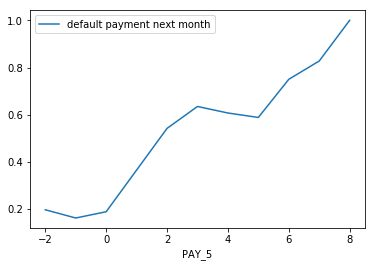

In [84]:
df.groupby('PAY_5').agg({'default payment next month': 'mean'}).plot()

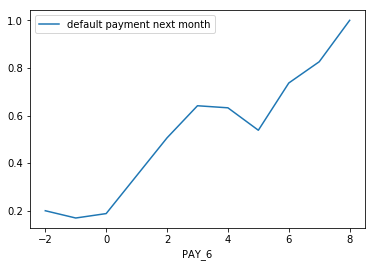

In [85]:
df.groupby('PAY_6').agg({'default payment next month': 'mean'}).plot()

How might we introduce other missing values, that might be a little more obvious in terms of the replacement strategy?

https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas

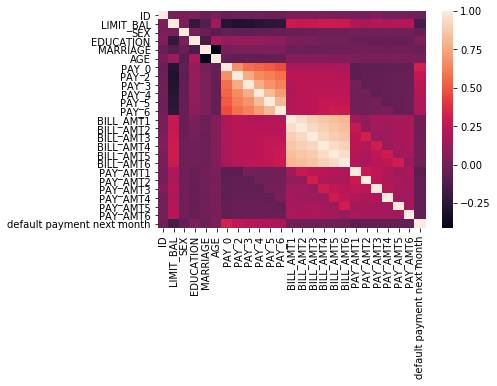

In [61]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1,
                        fit_intercept=True, intercept_scaling=1, class_weight='balanced',
                        random_state=24, solver='liblinear', max_iter=100,
                        multi_class='auto', verbose=0, warm_start=False, n_jobs=None)

In [26]:
lr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=24,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_lr_pred_proba = lr.predict_proba(X_test)

In [28]:
metrics.roc_auc_score(y_test, y_lr_pred_proba[:,1])
#L2 reg
# C = 
#1e6: 0.7170399065097639
#100000: 0.7154806778010367
#10000: 0.7169929264916672
#1000: 0.7178201557292371
#100: 0.7170353037377208
#10: 0.7179298286768888
#1: 0.7179541122673239
#0.1: 0.7170626029374256
#0.01: 0.7183140807843631
#0.001: 0.7180752127869452
#0.0001: 0.7093162963048787

0.7196401552816571